In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Import Dataset**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/bank_marketing/bank.xls')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

# **Data Visualization**

**Checking the categorical variables**

In [6]:
print('Jobs: ', df['job'].unique())
print('\nMarital: ', df['marital'].unique())
print('\nEducation: ', df['education'].unique())
print('\nDefault: ', df['default'].unique())
print('\nHousing: ', df['housing'].unique())
print('\nLoan: ', df['loan'].unique())

Jobs:  ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

Marital:  ['married' 'single' 'divorced']

Education:  ['secondary' 'tertiary' 'primary' 'unknown']

Default:  ['no' 'yes']

Housing:  ['yes' 'no']

Loan:  ['no' 'yes']


**Check null values**

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Min age:  18
Max age:  95
Null Values:  False


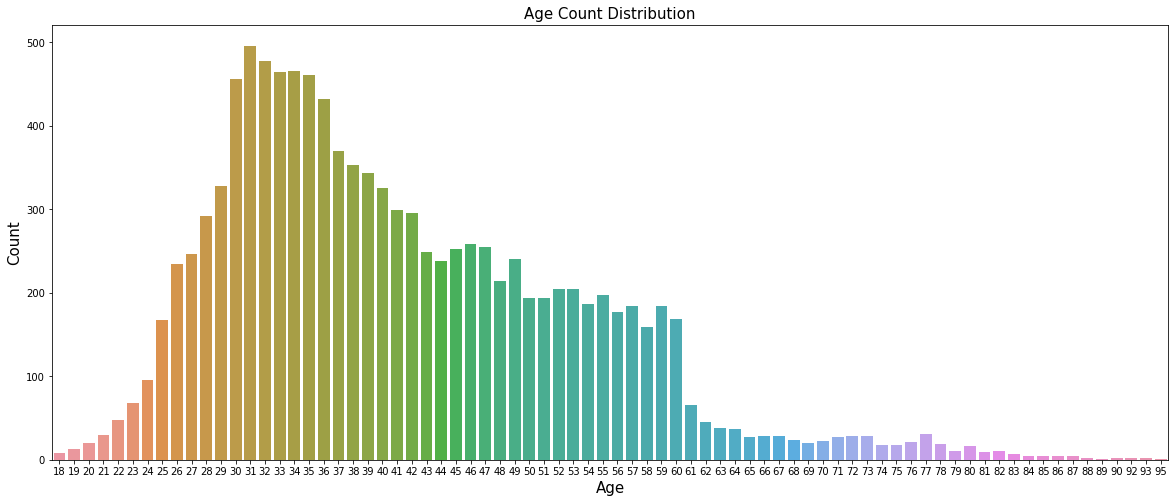

In [8]:
print('Min age: ', df['age'].min())
print('Max age: ', df['age'].max())
print('Null Values: ', df['age'].isnull().any())

fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Age Count Distribution', fontsize = 15);

In [9]:
print('1º Quartile: ', df['age'].quantile(q = 0.25))
print('2º Quartile: ', df['age'].quantile(q = 0.50))
print('3º Quartile: ', df['age'].quantile(q = 0.75))
print('4º Quartile: ', df['age'].quantile(q = 1.00))
print('Age above', df['age'].quantile(q = 0.75) + 1.5 * (df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'years are outliers')

1º Quartile:  32.0
2º Quartile:  39.0
3º Quartile:  49.0
4º Quartile:  95.0
Age above 74.5 years are outliers


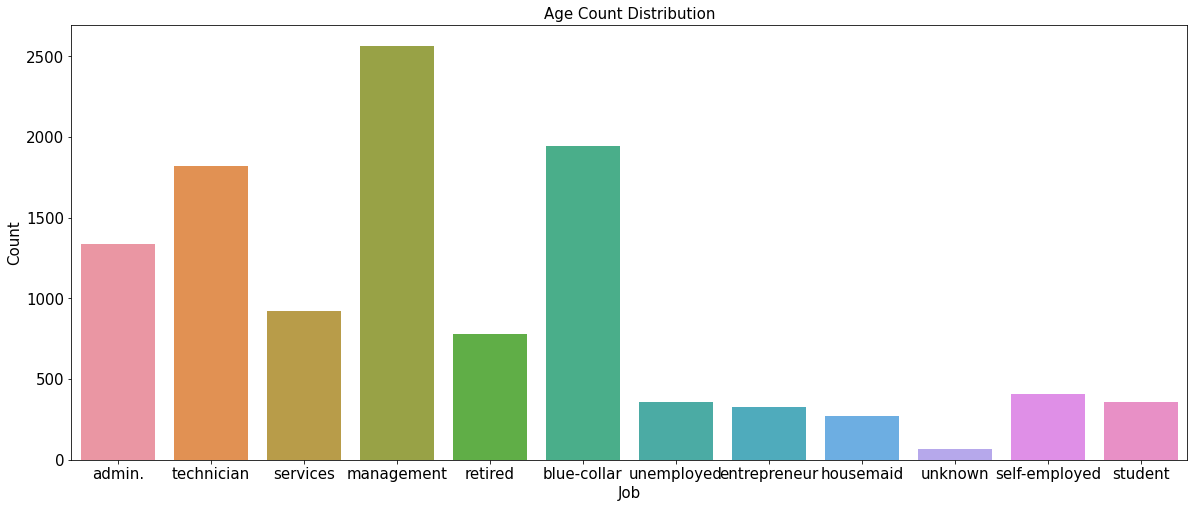

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data = df)
ax.set_xlabel('Job', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Age Count Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)

*The despine() is a function that removes the spines from the right and upper portion of the plot by default. sns. despine(left = True) helps remove the spine from the left.*

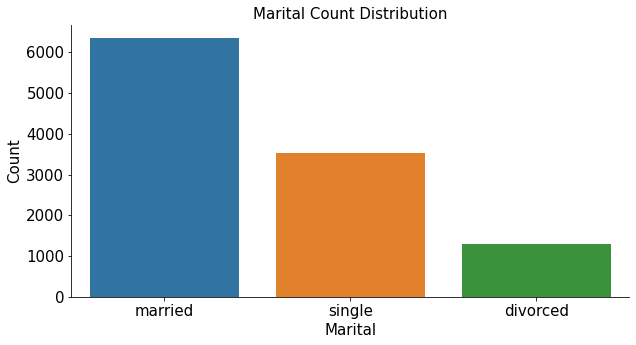

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 5)
sns.countplot(x = 'marital', data = df)
ax.set_xlabel('Marital', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Marital Count Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine()

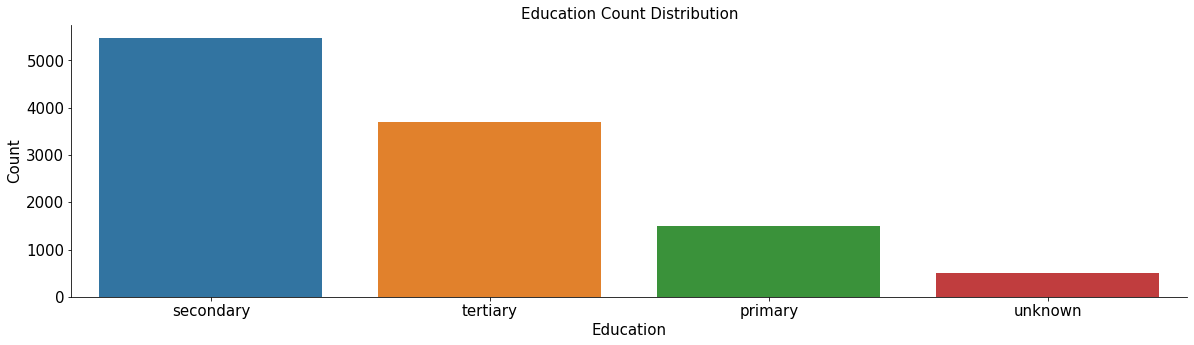

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 5)
sns.countplot(x = 'education', data = df)
ax.set_xlabel('Education', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Education Count Distribution', fontsize = 15)
ax.tick_params(labelsize = 15)
sns.despine()

In [13]:
df.duplicated().sum()

0

In [14]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [16]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

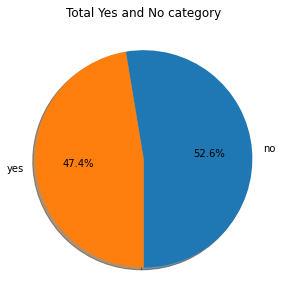

In [17]:
plt.figure(figsize = (12, 5))
labels = df['deposit'].value_counts(sort = True).index
sizes = df['deposit'].value_counts(sort = True)
plt.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 270);
plt.title('Total Yes and No category', size = 12);

# **Data Cleaning**

In [18]:
df_category = df.select_dtypes(include = 'object').columns.drop(['deposit', 'job'])
df_category

Index(['marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

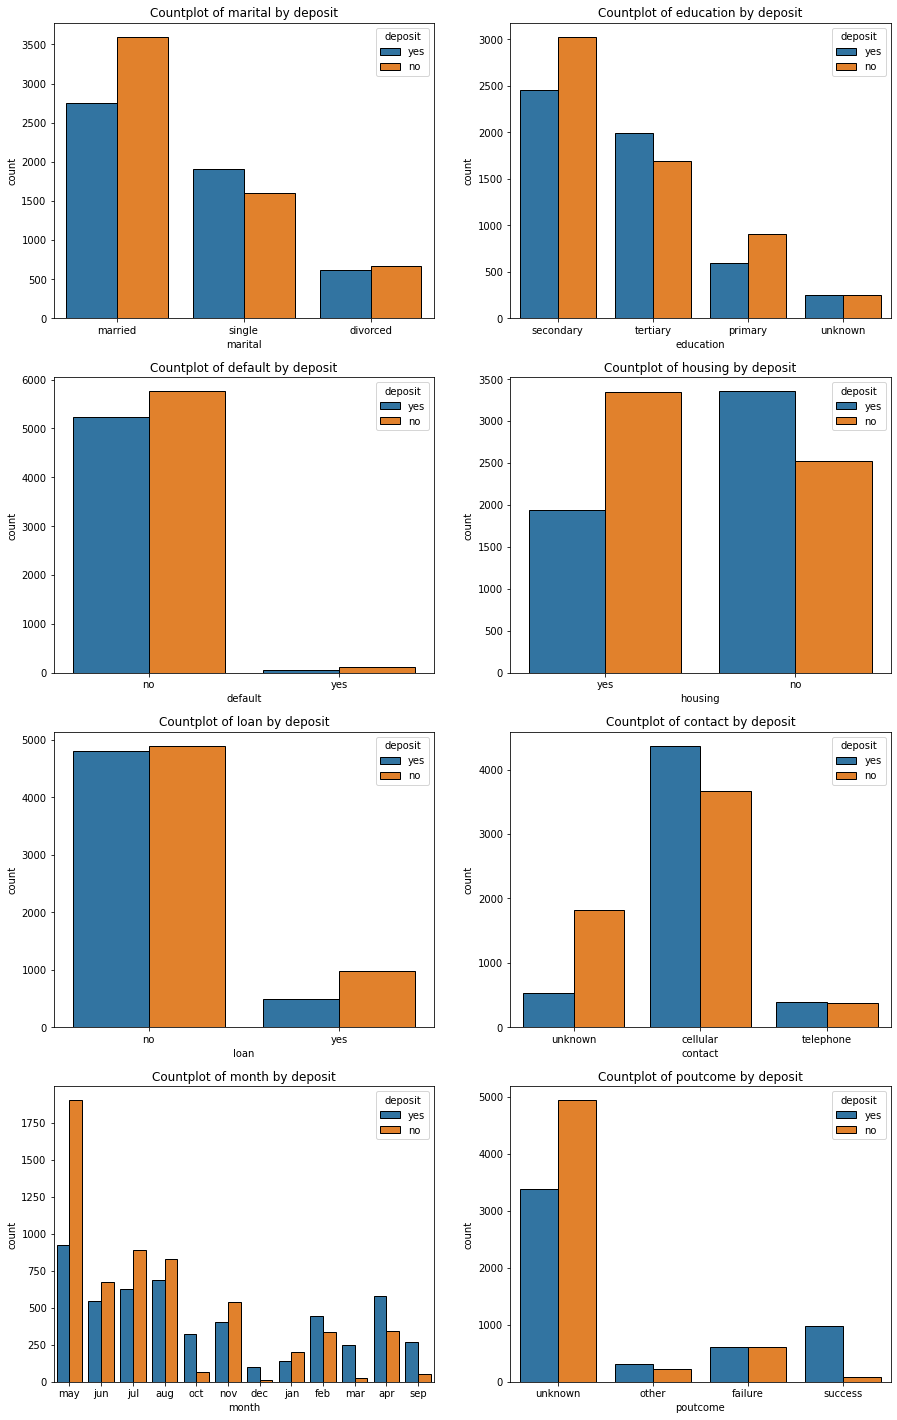

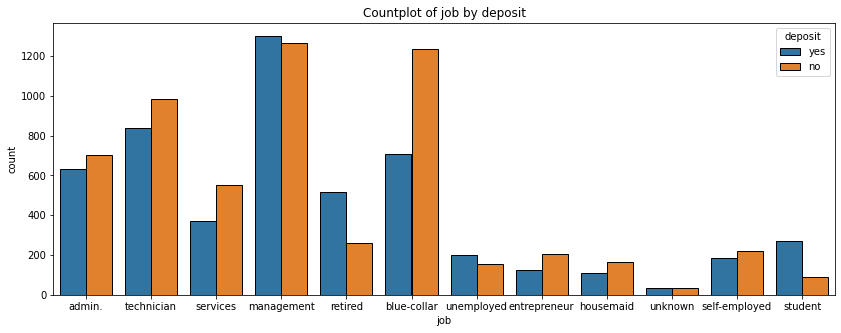

In [19]:
plt.figure(figsize = (15, 25))
for i, cat_fea in enumerate(df_category):
  plt.subplot(4, 2, i + 1)
  sns.countplot(x = cat_fea, hue = 'deposit', data = df, edgecolor = 'black')
  plt.title('Countplot of {} by deposit'.format(cat_fea))

plt.show()
plt.figure(figsize = [14, 5])
sns.countplot(x = 'job', hue = 'deposit', edgecolor = 'black', data = df)
plt.title('Countplot of job by deposit')
plt.show()

1. Single person is more likely to subscribe for deposit as compared to married one.
2. People with no housing loan are more likely to subscribe the term deposit.
3. Cellular contact has more chances that person will subscribe the term deposit while unknown has very very less.
4. Most calls were done in the month of May, least were done in December.
5. Students and retired people are more likely to subscribe for term deposit.

0 age
1 balance
2 day
3 duration
4 campaign
5 pdays
6 previous


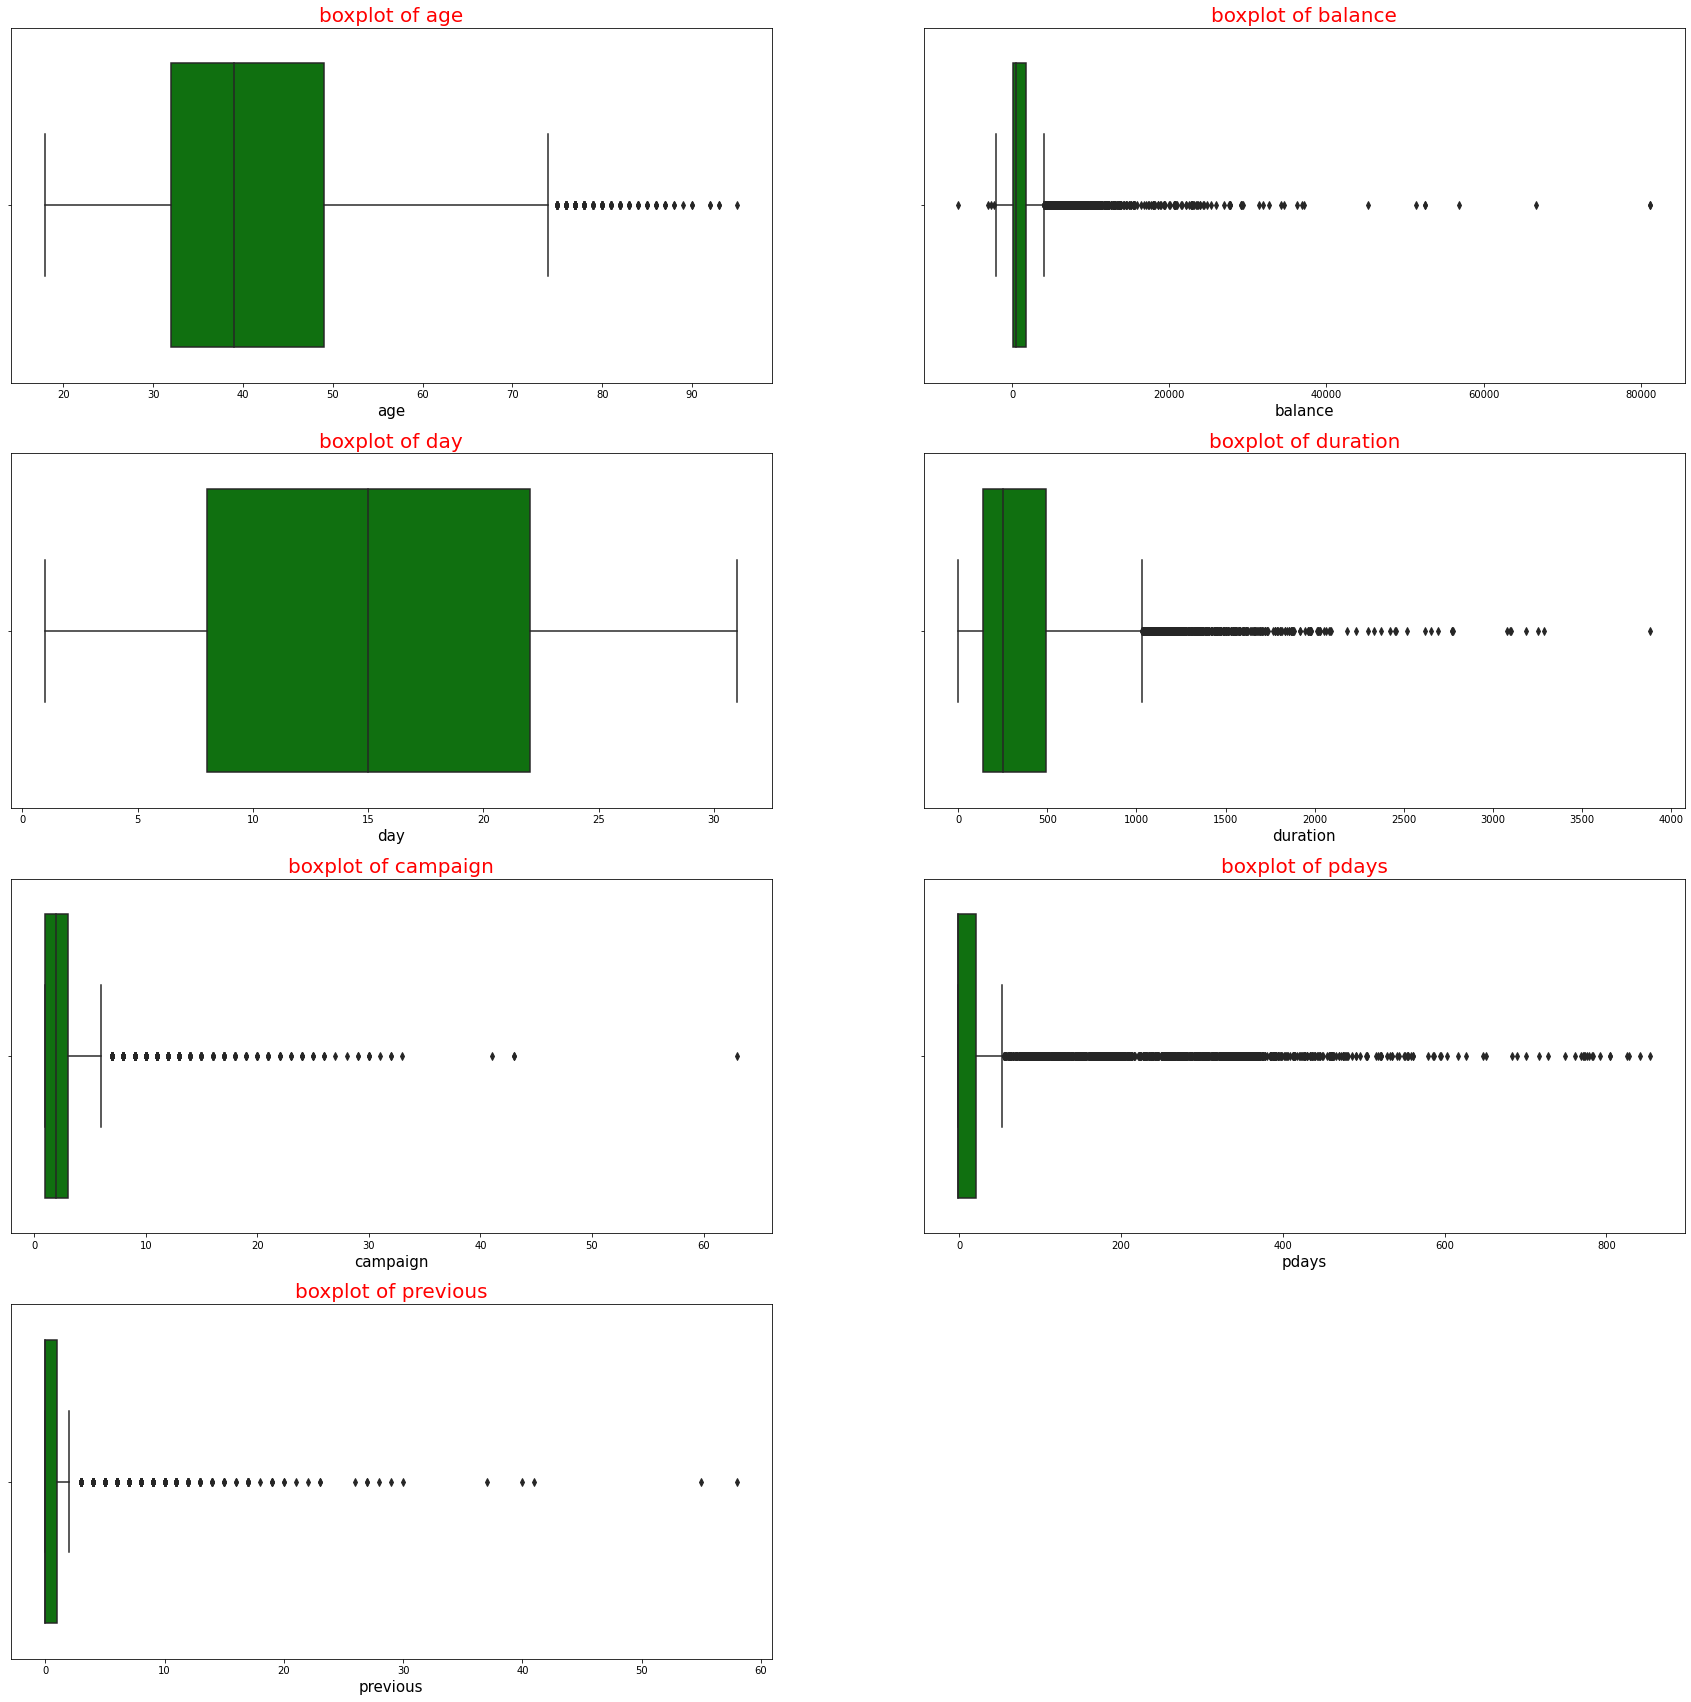

In [20]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']]
col = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
plt.figure(figsize = (30, 30))
for i, v in enumerate(col):
  print(i, v)
  plt.subplot(4, 2, i + 1)
  sns.boxplot(x = v, data = df_num, color = 'green')
  plt.title('boxplot of {}'.format(v), size = 20, color = 'red')
  plt.xlabel('{}'.format(v), size = 15)
plt.show()

**Drop negative values of balance**

In [21]:
len(df[df['balance'] < 0])

688

In [22]:
df[df['balance'] < 0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
17,49,services,married,secondary,no,-8,yes,no,unknown,8,may,1119,1,-1,0,unknown,yes
23,43,blue-collar,married,primary,no,-192,yes,no,unknown,8,may,1120,2,-1,0,unknown,yes
30,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,yes
42,45,entrepreneur,divorced,tertiary,no,-395,yes,no,unknown,13,may,470,1,-1,0,unknown,yes
59,57,technician,married,tertiary,no,-1,no,no,unknown,14,may,850,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,39,management,married,tertiary,no,-974,no,yes,cellular,13,aug,130,4,-1,0,unknown,no
11120,50,management,married,tertiary,no,-516,yes,no,unknown,15,may,226,2,-1,0,unknown,no
11132,32,blue-collar,married,secondary,no,-325,yes,yes,unknown,21,may,171,1,-1,0,unknown,no
11145,60,retired,divorced,tertiary,no,-134,no,no,cellular,12,may,243,1,271,4,failure,no


In [23]:
df.drop(df[ (df['balance'] > 40000) | (df['balance'] < 0) ].index, inplace = True, axis = 0)

**Drop records with duration > 3000 which acts as outliers**

In [24]:
df.drop(df[df['duration'] > 3000].index, inplace = True, axis = 0)

**Drop records with campaign > 40 which acts as outliers**

In [25]:
df.drop(df[df['campaign'] > 30].index, axis = 0, inplace = True)

**Drop records with previous > 30 which acts as outliers**

In [26]:
df.drop(df[df['previous'] > 30].index, axis = 0, inplace = True)

**Drop pdays**

In [27]:
df.drop('pdays', inplace = True, axis = 1)

In [28]:
df1 = df.copy()

In [29]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,unknown,yes


**Correlation Heatmap**

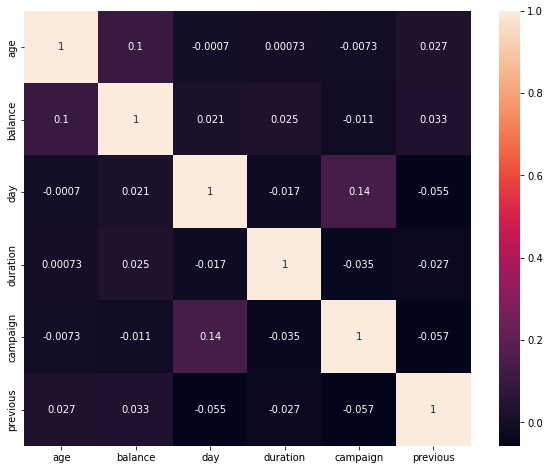

In [30]:
df_num = df[['age', 'balance', 'day', 'duration', 'campaign', 'previous']]
plt.figure(figsize = (10, 8))
sns.heatmap(data = df_num.corr(), annot = True)
plt.show()

There is no multi-colinearity problem as there is no relation with input columns

Encoding of categorical features
- A categorical variable is one that has two or more categories (values).
- There are two types of categorical variable, nominal and ordinal. A nominal variable has no intrinsic ordering to its categories. An ordinal variable has a clear ordering.

In [31]:
from sklearn.preprocessing import LabelEncoder
dic = {'yes': 1, 'no': 0}
lst = ['deposit', 'loan', 'default', 'housing']
for i in lst:
  df[i] = df[i].map(dic)

**Ordinal Encoding**

In [32]:
l = ['month', 'contact', 'poutcome']
for i in l:
  le = LabelEncoder()
  df[i] = le.fit_transform(df[i].values)

**OneHot Encoding**

In [33]:
df = pd.get_dummies(df, columns = ['job', 'marital', 'education'])

In [34]:
df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,0,2343,1,0,2,5,8,1042,1,...,0,0,0,0,1,0,0,1,0,0
1,56,0,45,0,0,2,5,8,1467,1,...,0,0,0,0,1,0,0,1,0,0
2,41,0,1270,1,0,2,5,8,1389,1,...,1,0,0,0,1,0,0,1,0,0
3,55,0,2476,1,0,2,5,8,579,1,...,0,0,0,0,1,0,0,1,0,0
4,54,0,184,0,0,2,5,8,673,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,0,1,1,0,0,20,0,257,1,...,0,0,0,0,0,1,1,0,0,0
11158,39,0,733,0,0,2,16,6,83,4,...,0,0,0,0,1,0,0,1,0,0
11159,32,0,29,0,0,0,19,1,156,2,...,1,0,0,0,0,1,0,1,0,0
11160,43,0,0,0,1,0,8,8,9,2,...,1,0,0,0,1,0,0,1,0,0


In [35]:
df = df.reset_index()
df.drop('index', axis = 1, inplace = True)

In [36]:
df

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
0,59,0,2343,1,0,2,5,8,1042,1,...,0,0,0,0,1,0,0,1,0,0
1,56,0,45,0,0,2,5,8,1467,1,...,0,0,0,0,1,0,0,1,0,0
2,41,0,1270,1,0,2,5,8,1389,1,...,1,0,0,0,1,0,0,1,0,0
3,55,0,2476,1,0,2,5,8,579,1,...,0,0,0,0,1,0,0,1,0,0
4,54,0,184,0,0,2,5,8,673,2,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10444,33,0,1,1,0,0,20,0,257,1,...,0,0,0,0,0,1,1,0,0,0
10445,39,0,733,0,0,2,16,6,83,4,...,0,0,0,0,1,0,0,1,0,0
10446,32,0,29,0,0,0,19,1,156,2,...,1,0,0,0,0,1,0,1,0,0
10447,43,0,0,0,1,0,8,8,9,2,...,1,0,0,0,1,0,0,1,0,0


# **Data Preprocessing**

In [37]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedShuffleSplit, StratifiedKFold, cross_val_score, GridSearchCV

- X - Independent Variables (Inputs features)
- Y - Dependent Variables (Target or Output Variables)

In [38]:
X = df.drop('deposit', axis = 1)
Y = df['deposit']

StratifiedShuffleSplit
- It is a combination of both ShuffleSplit and StratifiedKFold.
- Using StratifiedShuffleSplit the proportion of distribtuion of class labels is almost even between train and test dataset.
- The major difference between StratifiedShuffleSplit and StratifiedKFold(shuffle = True) is that in StratifiedKFold, the dataset is shuffled only once in the beginning and then split into the specified number of folds.
- However, in StratifiedShuffleSplit the data is shuffled each time before the split is done and this is why there's a greater chance that overlapping might be possible between train-test sets.

In [39]:
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 1)

In [40]:
for train_index, test_index in sss.split(X, Y):
  train_df = df.loc[train_index]
  test_df = df.loc[test_index]

In [41]:
print('Ratio for train dataset')
print(train_df['deposit'].value_counts())
print('Ratio for test dataset')
print(test_df['deposit'].value_counts())

Ratio for train dataset
0    3767
1    3547
Name: deposit, dtype: int64
Ratio for test dataset
0    1615
1    1520
Name: deposit, dtype: int64


In [42]:
X_train = train_df.drop('deposit', axis = 1)
Y_train = train_df['deposit']
X_test = test_df.drop('deposit', axis = 1)
Y_test = test_df['deposit']

In [43]:
X_train

,age,default,balance,housing,loan,contact,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown
5461,28,0,674,1,0,1,14,8,921,4,...,0,0,0,0,1,0,1,0,0,0
4220,36,0,324,1,1,0,16,5,830,1,...,0,0,0,0,1,0,0,1,0,0
5530,56,0,1480,1,1,0,5,3,576,1,...,1,0,0,1,0,0,0,1,0,0
4249,31,0,26965,0,0,0,21,0,654,2,...,0,0,0,0,0,1,1,0,0,0
9514,30,0,177,1,0,0,9,0,62,2,...,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8100,34,0,425,1,0,0,16,5,1389,7,...,0,0,0,0,1,0,1,0,0,0
4223,27,0,11862,0,0,0,25,9,285,2,...,1,0,0,0,0,1,0,0,1,0
343,26,0,551,0,0,0,8,5,531,1,...,0,0,0,0,0,1,0,1,0,0
4449,41,0,5517,1,0,0,10,5,584,1,...,0,0,0,0,1,0,0,1,0,0


Feature Scaling
- Feature Scaling is a technique to normalize/standardise the independent features present in the dataset in a fixed range.
- As there are some algorithms such as Logisitc regression KNN SVM that required scaling data to maximize accuracy.

Some machine learning algorithms are sensitive, they work on distance formulas and use gradient descent as an optimizer. Having values on the same scales helps gradient descent to reach global minima smoothly. For example, Logistic Regression, Support Vector Machine, K Nearest Neighbours, K-means etc.

In [44]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.fit_transform(X_test)

# **Model Training**

In [45]:
from sklearn import model_selection
import xgboost
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler 

In [46]:
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

**Logistic Regression**

In [47]:
lr = LogisticRegression()
lr.fit(X_train_s, Y_train)
Y_pred_lr = lr.predict(X_test_s)

In [48]:
print('Testing accuracy of LogisticRegression: ', metrics.accuracy_score(Y_test, Y_pred_lr))
print('Training accuracy of LogisticRegression: ', lr.score(X_train_s, Y_train))

Testing accuracy of LogisticRegression:  0.7888357256778309
Training accuracy of LogisticRegression:  0.7950505879135904


**SVM (Support Vector Machine)**

In [49]:
svm = svm.SVC(C = 1, kernel = 'linear')
svm.fit(X_train_s, Y_train)
Y_pred_svm = svm.predict(X_test_s)

In [50]:
print('Testing accuracy of SVM: ', metrics.accuracy_score(Y_test, Y_pred_svm))
print('Training accuracy of SVM: ', svm.score(X_train_s, Y_train))

Testing accuracy of SVM:  0.7913875598086124
Training accuracy of SVM:  0.7955974842767296


In [51]:
from sklearn.svm import SVC
param_grid = {'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01], 'kernel': ['rbf', 'linear', 'sigmoid']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)
grid.fit(X_train_s, Y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             verbose=1)

In [52]:
print(grid.best_params_)
gd_best = grid.best_estimator_
gd_best.fit(X_train_s, Y_train)

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


SVC(C=10, gamma=0.01)

In [53]:
svm = SVC(C = 10, kernel = 'rbf', gamma = 0.01)
svm.fit(X_train_s, Y_train)
Y_pred_svm = svm.predict(X_test_s)
print('Testing accuracy of SVM: ', metrics.accuracy_score(Y_test, Y_pred_svm))
print('Training accuracy of SVM: ', svm.score(X_train_s, Y_train))

Testing accuracy of SVM:  0.7987240829346093
Training accuracy of SVM:  0.8430407437790539


**Decision Tree**

In [54]:
dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(X_train_s, Y_train)
Y_pred_dt = dt.predict(X_test_s)

In [55]:
print('Testing accuracy of Decision Tree: ', metrics.accuracy_score(Y_test, Y_pred_dt))
print('Training accuracy of Decision Tree: ', dt.score(X_train_s, Y_train))

Testing accuracy of Decision Tree:  0.7821371610845295
Training accuracy of Decision Tree:  1.0


[[1289  326]
 [ 357 1163]]


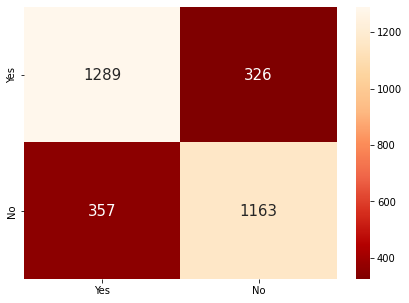

In [56]:
print(confusion_matrix(Y_test, Y_pred_dt))
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(Y_test, Y_pred_dt), annot = True, cmap = 'OrRd_r', fmt = 'd',
            cbar = True, xticklabels = ['Yes', 'No'], yticklabels = ['Yes', 'No'], annot_kws = {'fontsize': 15})
plt.show()

**K-Nearest Neighbours**

The optimal number of neighbors is 12 with 73.3%


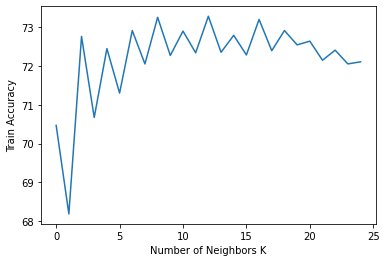

In [57]:
neighbors = np.arange(0, 25)
cv_scores = []
for k in neighbors:
  k_value = k + 1
  knn = KNeighborsClassifier(n_neighbors = k_value, weights = 'uniform', p = 2, metric = 'euclidean')
  kfold = model_selection.KFold(n_splits = 10)
  scores = model_selection.cross_val_score(knn, X_train_s, Y_train, cv = kfold, scoring = 'accuracy')
  cv_scores.append(scores.mean() * 100)

optimal_k = neighbors[cv_scores.index(max(cv_scores))]
print('The optimal number of neighbors is %d with %0.1f%%'%(optimal_k, cv_scores[optimal_k]))
plt.plot(neighbors, cv_scores)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Train Accuracy')
plt.show()

In [58]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train_s, Y_train)
Y_pred_knn = knn.predict(X_test_s)

In [59]:
print('Testing Accuracy of KNN: ', metrics.accuracy_score(Y_test, Y_pred_knn))
print('Training Accuracy of KNN: ', knn.score(X_train_s, Y_train))

Testing Accuracy of KNN:  0.7295055821371611
Training Accuracy of KNN:  0.7716707683893902


In [60]:
knn_cv = (cross_val_score(knn, X_train_s, Y_train, cv = k_fold, n_jobs = 1, scoring = 'accuracy').mean())
print(knn_cv)

0.7260063689982283


**Gaussian Naive Bayes**

In [61]:
nb = GaussianNB()
nb.fit(X_train_s, Y_train)
Y_pred_nb = nb.predict(X_test_s)

In [62]:
print('Testing Accuracy of Naive Bayes: ', metrics.accuracy_score(Y_test, Y_pred_knn))
print('Training Accuracy of Naive Bayes: ', nb.score(X_train_s, Y_train))

Testing Accuracy of Naive Bayes:  0.7295055821371611
Training Accuracy of Naive Bayes:  0.7108285479901558


**Random Forest**

In [63]:
rf = RandomForestClassifier(random_state = 0, n_estimators = 200, max_depth = 10)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [64]:
print('Testing accuracy of RF: ', metrics.accuracy_score(Y_test, Y_pred_rf))
print('Training accuracy of RF: ', rf.score(X_train, Y_train))

Testing accuracy of RF:  0.8331738437001595
Training accuracy of RF:  0.8850150396499863


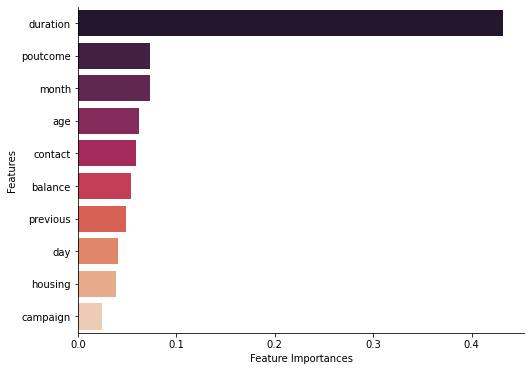

In [65]:
plt.figure(figsize = (8, 6))
importances= rf.feature_importances_
feature_importances= pd.Series(importances, index = X_train.columns).sort_values(ascending = False)
sns.barplot(x = feature_importances[0:10], y = feature_importances.index[0:10], palette = "rocket")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

**Gradient Boosting**

In [66]:
gb = GradientBoostingClassifier(random_state = 5)
gb.fit(X_train_s, Y_train.squeeze().values)
y_train_preds = gb.predict(X_train_s)
y_test_preds = gb.predict(X_test_s)

In [67]:
print('Accuracy of the GB is: ', metrics.accuracy_score(Y_test, y_test_preds))
print('Accuracy of the GB is: ', metrics.accuracy_score(y_train_preds, Y_train))

Accuracy of the GB is:  0.836682615629984
Accuracy of the GB is:  0.8565764287667487


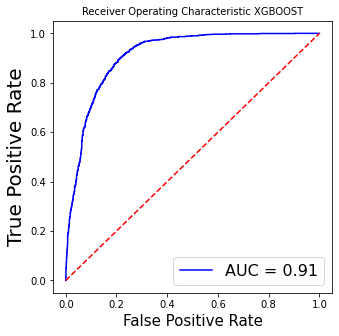

In [68]:
probs = gb.predict_proba(X_test_s)
preds = probs[:,1]
fpr, tpr, threshold_xgb = metrics.roc_curve(Y_test, preds)
rocauc = metrics.auc(fpr, tpr)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
ax.plot(fpr, tpr, 'b', label = 'AUC = %0.2f'%rocauc)
ax.plot([0, 1], [0, 1], 'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST', fontsize = 10)
ax.set_ylabel('True Positive Rate', fontsize = 20)
ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.legend(loc = 'lower right', prop = {'size': 16});

**XG Boost**

In [69]:
xgb = xgboost.XGBClassifier(n_estimators = 80, learning_rate = 0.1, gamma = 0, subsample = 0.75,
                            colsample_bytree = 1, max_depth = 5)
xgb.fit(X_train_s, Y_train.squeeze().values)

XGBClassifier(max_depth=5, n_estimators=80, subsample=0.75)

In [70]:
y_train_preds = xgb.predict(X_train_s)
y_test_preds = xgb.predict(X_test_s)

In [71]:
print(xgb.score(X_test_s, Y_test))
print(xgb.score(X_train_s, Y_train))

0.8507177033492823
0.8833743505605688


In [72]:
print('Test accuracy of XGB is', metrics.accuracy_score(Y_test, y_test_preds)) 
print('Train accuracy of XGB is', metrics.accuracy_score(y_train_preds, Y_train))

Test accuracy of XGB is 0.8507177033492823
Train accuracy of XGB is 0.8833743505605688


In [73]:
print(classification_report(Y_test, y_test_preds))
print(confusion_matrix(Y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1615
           1       0.83      0.88      0.85      1520

    accuracy                           0.85      3135
   macro avg       0.85      0.85      0.85      3135
weighted avg       0.85      0.85      0.85      3135

[[1332  283]
 [ 185 1335]]


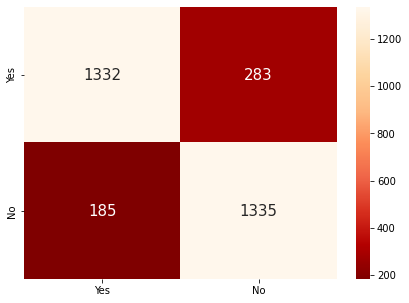

In [74]:
plt.figure(figsize = (7, 5))
sns.heatmap(confusion_matrix(Y_test, y_test_preds), annot = True, cmap = 'OrRd_r', fmt = 'd',
            cbar = True, xticklabels = ['Yes', 'No'], yticklabels = ['Yes', 'No'], annot_kws = {'fontsize': 15})
plt.show()

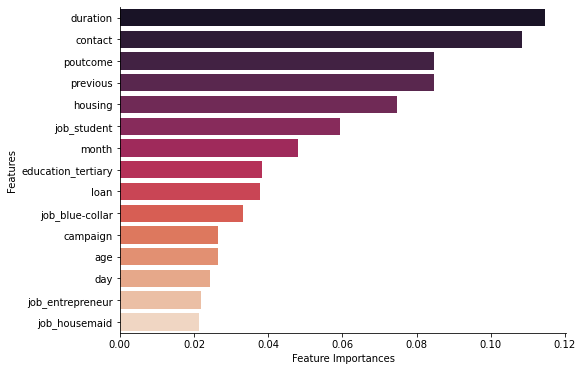

In [75]:
plt.figure(figsize = (8, 6))
importances = xgb.feature_importances_
feature_importances = pd.Series(importances, index = X_train.columns).sort_values(ascending = False) 
sns.barplot(x = feature_importances[:15], y = feature_importances.index[:15], palette = 'rocket')
sns.despine()
plt.xlabel('Feature Importances')
plt.ylabel('Features')
plt.show()

In [76]:
xg_svm_scores = cross_val_score(xgb, X = X_train_s, y = Y_train, cv = 5, scoring = 'accuracy', n_jobs = -1)
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(xg_svm_scores) * 100))

CV Mean Accuracy: 84.5%


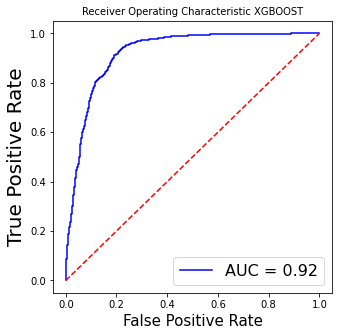

In [77]:
probs = xgb.predict_proba(X_test_s)
preds = probs[:,1]
fpr_xgb, tpr_xgb, threshold_xgb = metrics.roc_curve(Y_test, preds)
rocauc_xgb = metrics.auc(fpr_xgb, tpr_xgb)
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (5, 5))
ax.plot(fpr_xgb, tpr_xgb, 'b', label = 'AUC = %0.2f'%rocauc_xgb)
ax.plot([0, 1], [0, 1], 'r--')
ax.set_title('Receiver Operating Characteristic XGBOOST', fontsize = 10)
ax.set_ylabel('True Positive Rate', fontsize = 20)
ax.set_xlabel('False Positive Rate', fontsize = 15)
ax.legend(loc = 'lower right', prop = {'size': 16})

# **Model Deployment**

In [78]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import xgboost

In [79]:
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,5,failure,no


In [80]:
df1 = df1.reset_index()
df1.drop('index', axis = 1, inplace = True)

In [81]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,unknown,yes


**Binary Encoding**

In [82]:
dic = {"yes": 1, "no": 0}
lst = ["loan", "default", "housing"]
for i in lst:
    df1[i] = df1[i].map(dic)

**Encode of target variable(deposit)**

In [83]:
dic = {"yes": 1, "no": 0}
df1["deposit"] = df1["deposit"].map(dic)

In [84]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59,admin.,married,secondary,0,2343,1,0,unknown,5,may,1042,1,0,unknown,1
1,56,admin.,married,secondary,0,45,0,0,unknown,5,may,1467,1,0,unknown,1
2,41,technician,married,secondary,0,1270,1,0,unknown,5,may,1389,1,0,unknown,1
3,55,services,married,secondary,0,2476,1,0,unknown,5,may,579,1,0,unknown,1
4,54,admin.,married,tertiary,0,184,0,0,unknown,5,may,673,2,0,unknown,1


**Ordinal Encoding**

In [85]:
contact_list = df1['contact'].unique().tolist()
poutcome_list = ['success', 'unknown', 'other', 'failure']
month_list = df1['month'].unique().tolist()
month_list = list(reversed(month_list))

In [86]:
print(contact_list)
print(poutcome_list)
print(month_list)

['unknown', 'cellular', 'telephone']
['success', 'unknown', 'other', 'failure']
['sep', 'apr', 'mar', 'feb', 'jan', 'dec', 'nov', 'oct', 'aug', 'jul', 'jun', 'may']


In [87]:
contact_label  = list(range(0, 3, 1))
poutcome_label = list(range(0, 4, 1))
month_label = list(range(0, 12, 1))

In [88]:
dic_contact = dict(zip(contact_list, contact_label))
dic_poutcome = dict(zip(poutcome_list, poutcome_label))
dic_month = dict(zip(month_list, month_label))

In [89]:
print(dic_contact)
print(dic_poutcome)
print(dic_month)

{'unknown': 0, 'cellular': 1, 'telephone': 2}
{'success': 0, 'unknown': 1, 'other': 2, 'failure': 3}
{'sep': 0, 'apr': 1, 'mar': 2, 'feb': 3, 'jan': 4, 'dec': 5, 'nov': 6, 'oct': 7, 'aug': 8, 'jul': 9, 'jun': 10, 'may': 11}


**Mapping dict with ordinal category features**

In [90]:
df1["contact"] = df1["contact"].map(dic_contact)
df1["poutcome"] = df1["poutcome"].map(dic_poutcome)
df1["month"] = df1["month"].map(dic_month)

In [91]:
X = df1.drop('deposit', axis = 1)
Y = df1['deposit']

**StratifiedShuffleSplit**

In [92]:
sss = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, random_state = 1)
for train_index, test_index in sss.split(X, Y):
    train_df = df1.loc[train_index]
    test_df = df1.loc[test_index]

In [93]:
#Train and Test dataset
X_train = train_df.drop("deposit",axis=1)
Y_train = train_df['deposit']

X_test = test_df.drop("deposit",axis=1)
Y_test = test_df['deposit']

**Transformer**

In [94]:
trf1 = ColumnTransformer([('ohe', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), [1, 2, 3])], remainder = 'passthrough')

In [95]:
trf2 = ColumnTransformer(transformers = [('scaler', StandardScaler(), [0, -1])], remainder = 'passthrough')

In [96]:
trf3 = xgboost.XGBClassifier(n_estimators = 80, learning_rate = 0.1, gamma = 0, subsample = 0.75, colsample_bytree = 1, max_depth = 5)

In [97]:
pipe = Pipeline([
    ('trf1', trf1),
    ('trf2', trf2),
    ('trf3', trf3)
])

In [98]:
pipe.steps

[('trf1', ColumnTransformer(remainder='passthrough',
                    transformers=[('ohe',
                                   OneHotEncoder(handle_unknown='ignore',
                                                 sparse=False),
                                   [1, 2, 3])])),
 ('trf2', ColumnTransformer(remainder='passthrough',
                    transformers=[('scaler', StandardScaler(), [0, -1])])),
 ('trf3', XGBClassifier(max_depth=5, n_estimators=80, subsample=0.75))]

In [99]:
pipe.fit(X_train, Y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [1, 2, 3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  [0, -1])])),
                ('trf3',
                 XGBClassifier(max_depth=5, n_estimators=80, subsample=0.75))])

In [100]:
y_pred = pipe.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 1, 0])

In [101]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1615
           1       0.83      0.87      0.85      1520

    accuracy                           0.85      3135
   macro avg       0.85      0.85      0.85      3135
weighted avg       0.85      0.85      0.85      3135



In [102]:
from sklearn.metrics import accuracy_score 
accuracy_score(Y_test, y_pred)

0.8507177033492823

In [103]:
score = cross_val_score(pipe, X_train, Y_train, cv = 10, scoring = 'accuracy') 
print('Mean accuracy of XGB', score.mean())

Mean accuracy of XGB 0.848785816270847


In [104]:
test_input = np.array([25, 'blue-collar', 'married', 'primary', 0, 5000, 0, 1, 1, 9, 11, 921, 10, 2, 2], dtype = object).reshape(1, 15)

In [105]:
df_test = pd.DataFrame(test_input, columns = X_train.columns)

In [106]:
df_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome
0,25,blue-collar,married,primary,0,5000,0,1,1,9,11,921,10,2,2


In [107]:
pipe.predict(df_test)

array([1])

In [108]:
import pickle
pickle.dump(rf, open('model.pkl', 'wb'))